# Curve fitting model

## Creating some data

First lets import some basic libraries and make our "random" noise reproducible.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

Now we can generate a chunk of a polynomial distribution with noise.

In [44]:
def polynomial(x, a):
    return a[2] * x ** 2 + a[1] * x + a[0]

xspan = np.linspace(0, 5, 100)
noise = np.random.normal(0, 0.3, 100)

data = polynomial(xspan, [2, 3, -1]) + noise

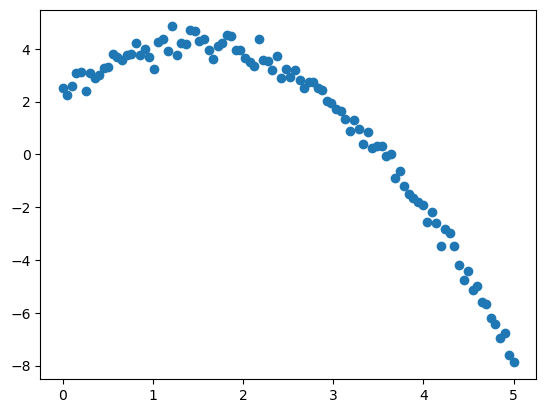

In [45]:
plt.figure()
plt.plot(xspan, data, 'o');

Finally, let's save our data into the repo so we can access it later. We will use the pandas library to make this trivial.

**Note**: since the code generates the data, there is no clear distinction between data and code.

In [39]:
df = pd.DataFrame(np.array([xspan, data]).T, columns=['x', 'y'])
df.reset_index()
df.to_json('data/example.json')
print(df)

           x         y
0   0.000000  2.529216
1   0.050505  2.269012
2   0.101010  2.586449
3   0.151515  3.103857
4   0.202020  3.125516
..       ...       ...
95  4.797980 -6.414699
96  4.848485 -6.959201
97  4.898990 -6.767371
98  4.949495 -7.610942
99  5.000000 -7.879403

[100 rows x 2 columns]


## Loading data

Since the format in which we store the data isn't necessarily intuitive, providing a basic usage example along with the data file is ideal.

In [41]:
df0 = pd.read_json('data/example.json')
print(df0)

           x         y
0   0.000000  2.529216
1   0.050505  2.269012
2   0.101010  2.586449
3   0.151515  3.103857
4   0.202020  3.125516
..       ...       ...
95  4.797980 -6.414699
96  4.848485 -6.959201
97  4.898990 -6.767371
98  4.949495 -7.610942
99  5.000000 -7.879403

[100 rows x 2 columns]


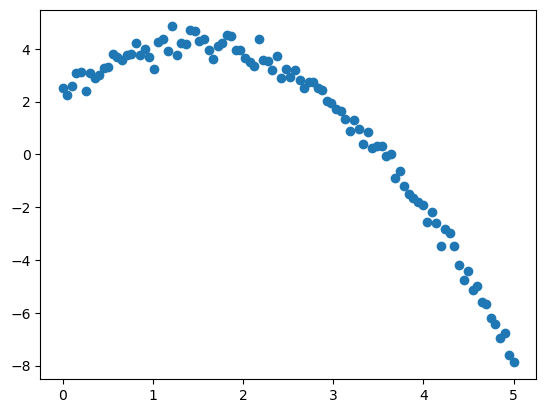

In [46]:
plt.figure()
x, y = df0['x'], df0['y']
plt.plot(x, y, 'o');

The above is probably sufficient for demonstrating how the data can be visualized, but we can also demonstrate a simple use case for the data as well.

In [47]:
from scipy.optimize import curve_fit

In [51]:
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, x, y)
print(popt)

[-2.01783963  6.18712057]


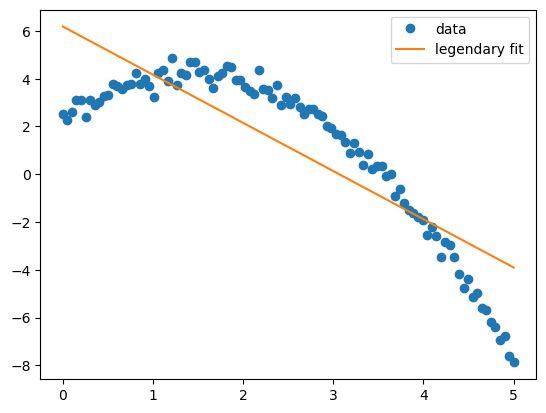

In [59]:
plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, linear(x, *popt), '-', label='legendary fit')
plt.legend();